QUESTION 5: PROFIL DE PRESSION HERTZIEN


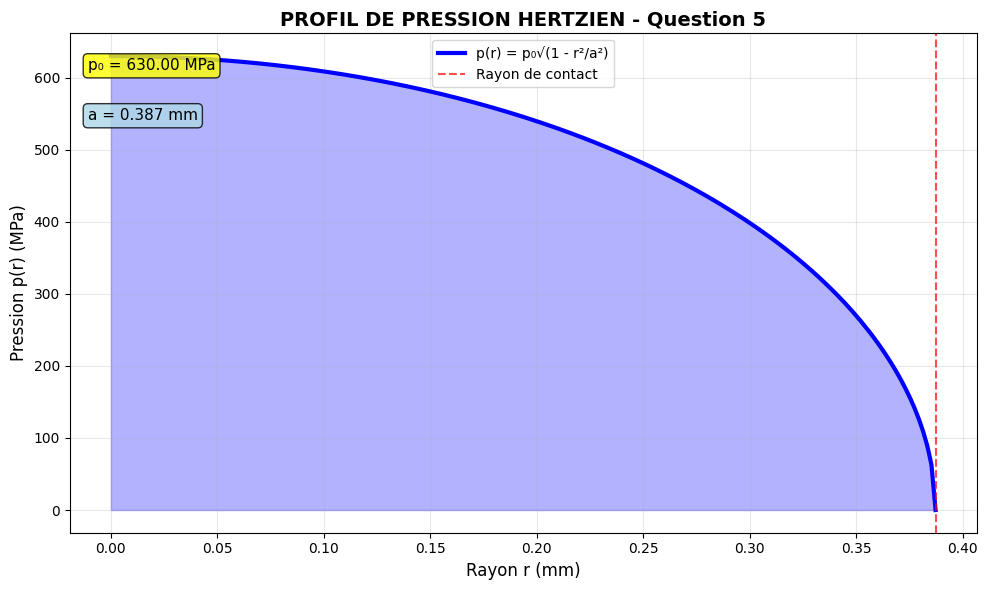


QUESTION 6: COURBE FORCE-DÉPLACEMENT ET CONTRAINTE-DÉFORMATION


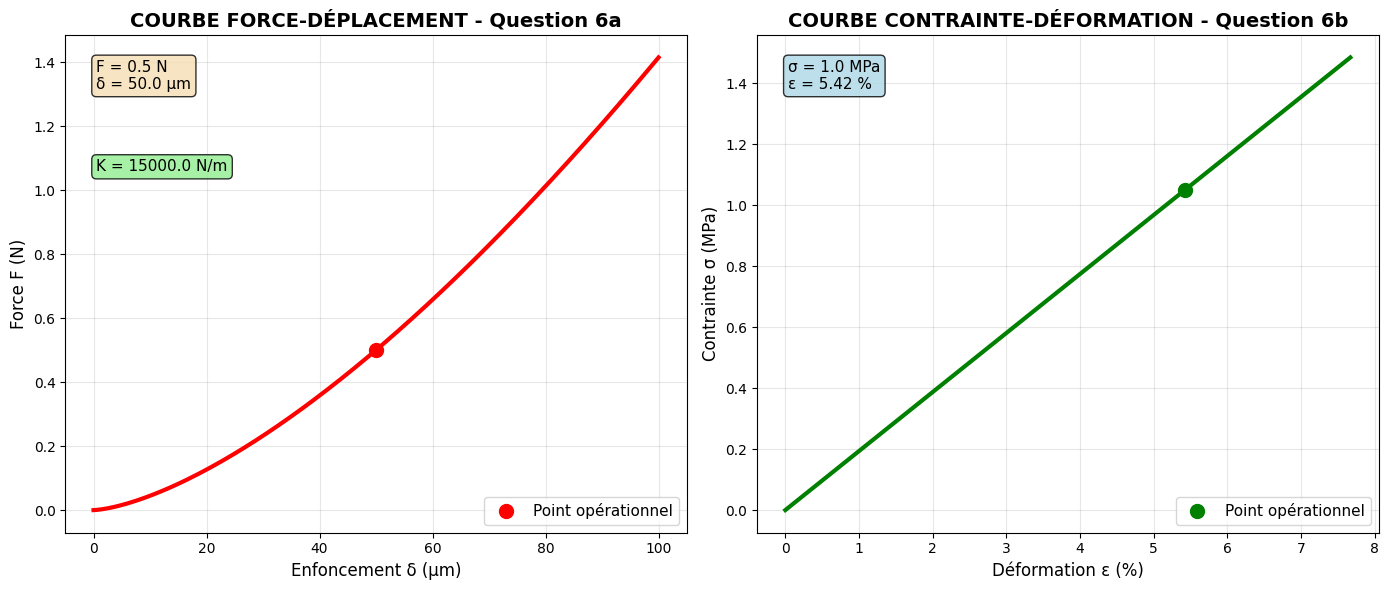


QUESTION 7: DÉPLACEMENTS À LA SURFACE z=0


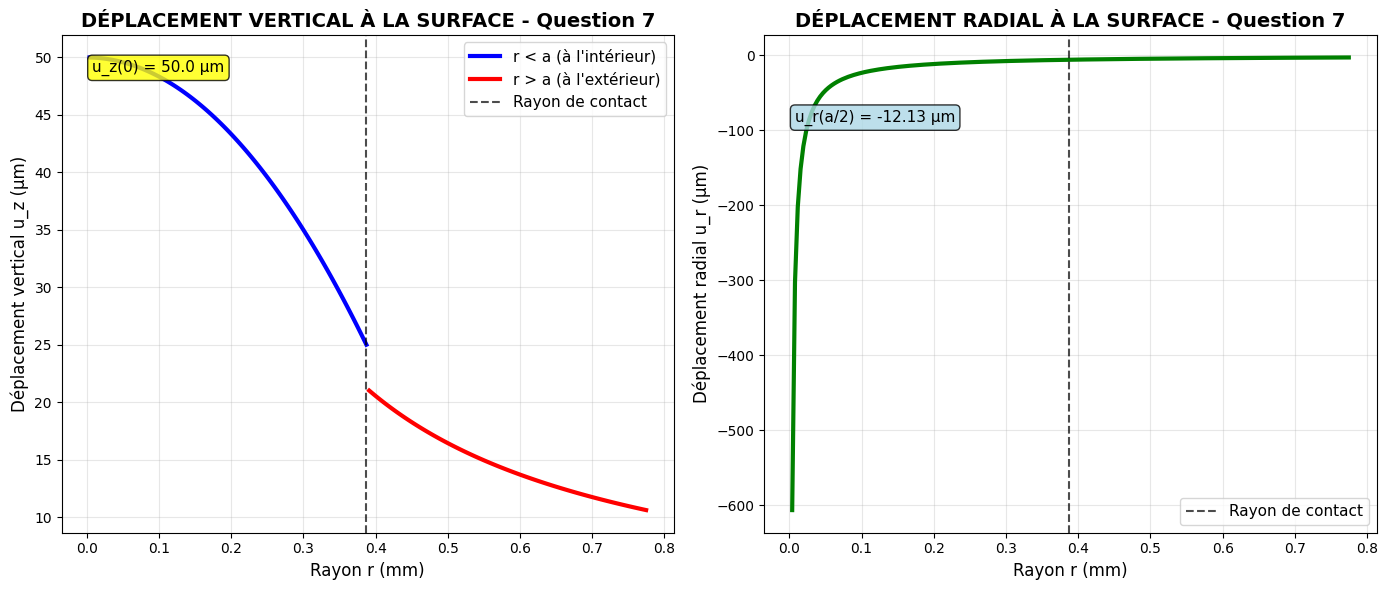


QUESTION 8: DÉPLACEMENTS À 1mm ET 2mm DU CERCLE


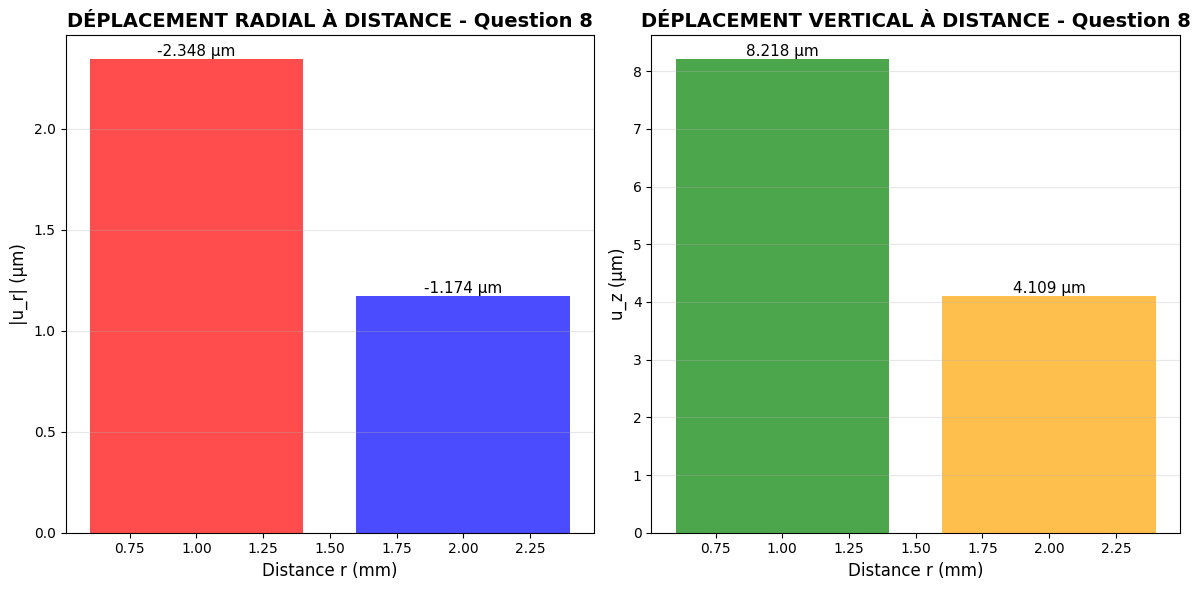


Valeurs calculées:
  À r = 1 mm:
    u_r = -2.348 μm
    u_z = 8.218 μm
  À r = 2 mm:
    u_r = -1.174 μm
    u_z = 4.109 μm

QUESTION 9: CONTRAINTES DANS LE CERCLE DE CONTACT


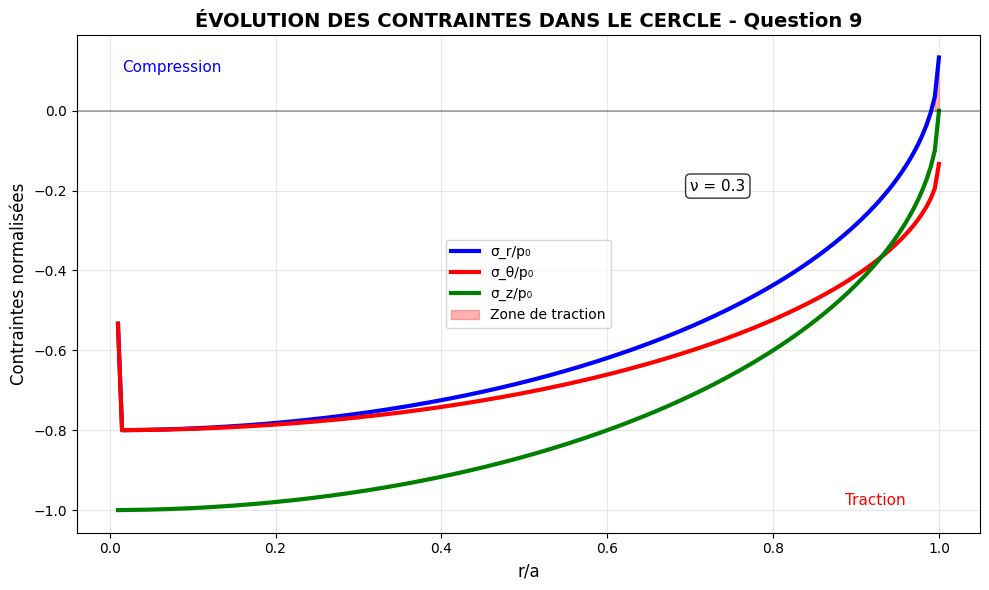


QUESTION 10: σ_z EN FONCTION DE LA PROFONDEUR


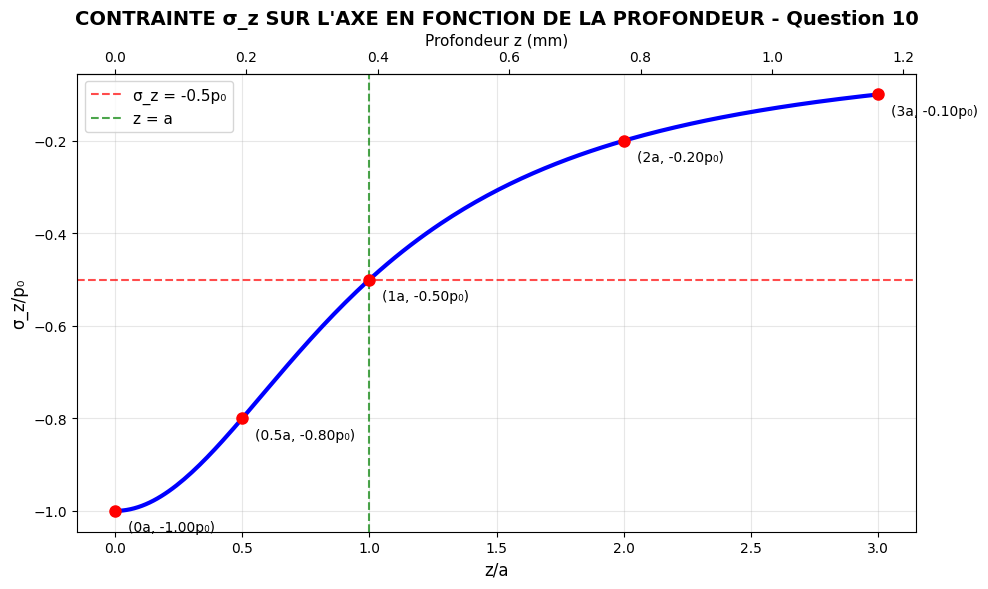


QUESTION 11: CONTRAINTE DE CISAILLEMENT


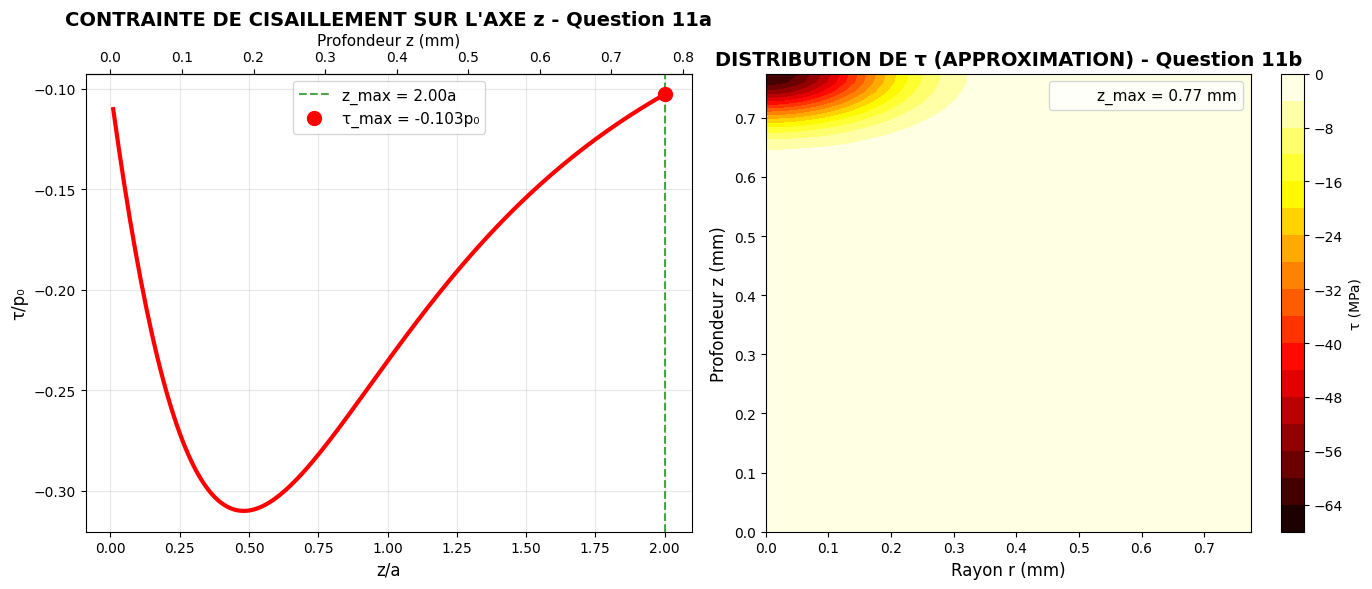


RÉCAPITULATIF COMPLET DES RÉSULTATS

1. Rayon de contact: a = 0.387 mm
2. Pressions:
   - Moyenne: p_moy = 420.00 MPa
   - Maximale: p_max = 630.00 MPa
3. Modules d'élasticité:
   - Effectif: E* = 0.02 GPa
   - Plan (ν2=0.3): E2 = 0.02 GPa
4. Raideur de contact: K = 15000.0 N/m
5. Profil de pression: p(r) = p_max × √(1 - r²/a²)
   avec p_max = 630.00 MPa et a = 0.387 mm
6. Loi force-déplacement: F = (4/3) × E* × √R × δ^(3/2)
7. Déplacements à la surface: u_z(0) = 50.0 μm
8. Déplacements à distance: valeurs calculées précédemment
9. Contraintes maximales dans le cercle:
   - σ_z max: 630.00 MPa (au centre)
   - σ_r de traction max: ~252.00 MPa (au bord)
10. σ_z(z=a) = 315.00 MPa (compression)
11. Contrainte de cisaillement:
    - τ_max = -64.73 MPa
    - Position: z = 0.775 mm

TOUS LES GRAPHIQUES ONT ÉTÉ GÉNÉRÉS


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ============================================
# DONNÉES ET CALCULS PRÉLIMINAIRES
# ============================================

# Données du problème
F_max = 0.5  # Force maximale [N]
delta = 50e-6  # Enfoncement [m]
d_sphere = 6e-3  # Diamètre de la sphère [m]
R = d_sphere / 2  # Rayon de la sphère [m]

# Propriétés de la bille
E1 = 210e9  # Module d'Young [Pa]
nu1 = 0.3  # Coefficient de Poisson

# Question 1: Rayon de contact
a = np.sqrt(R * delta)

# Calcul de E*
E_star = (3 * F_max * R) / (4 * a**3)

# Question 2: Pressions
p_moy = 0.42 * E_star * np.sqrt(8/R)
p_max = (3/2) * p_moy

# Question 3: Module du plan (supposition ν2 = 0.3)
nu2 = 0.3
term_E_star = 1/E_star
term_E1 = (1 - nu1**2) / E1
E2 = (1 - nu2**2) / (term_E_star - term_E1)

# Question 4: Raideur
K = 2 * a * E_star

# ============================================
# QUESTION 5: PROFIL DE PRESSION HERTZIEN
# ============================================

print("=" * 60)
print("QUESTION 5: PROFIL DE PRESSION HERTZIEN")
print("=" * 60)

def hertz_pressure(r, p0, a):
    """Profil de pression hertzien: p(r) = p0 × √(1 - r²/a²)"""
    with np.errstate(invalid='ignore'):
        return p0 * np.sqrt(1 - (r/a)**2)

# Création des données
r_vals = np.linspace(0, a, 200)
p_vals = hertz_pressure(r_vals, p_max, a)

# Tracé
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(r_vals*1000, p_vals/1e6, 'b-', linewidth=3, label='p(r) = p₀√(1 - r²/a²)')
ax1.fill_between(r_vals*1000, 0, p_vals/1e6, alpha=0.3, color='blue')
ax1.set_xlabel('Rayon r (mm)', fontsize=12)
ax1.set_ylabel('Pression p(r) (MPa)', fontsize=12)
ax1.set_title('PROFIL DE PRESSION HERTZIEN - Question 5', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Annotations
ax1.text(0.02, 0.95, f'p₀ = {p_max/1e6:.2f} MPa', transform=ax1.transAxes,
         verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
ax1.text(0.02, 0.85, f'a = {a*1000:.3f} mm', transform=ax1.transAxes,
         verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

ax1.axvline(x=a*1000, color='red', linestyle='--', alpha=0.7, label='Rayon de contact')
ax1.legend()

plt.tight_layout()
plt.show()

# ============================================
# QUESTION 6: COURBE FORCE-DÉPLACEMENT
# ============================================

print("\n" + "=" * 60)
print("QUESTION 6: COURBE FORCE-DÉPLACEMENT ET CONTRAINTE-DÉFORMATION")
print("=" * 60)

# Courbe force-déplacement
delta_range = np.linspace(0, delta*2, 200)
F_range = (4/3) * E_star * np.sqrt(R) * delta_range**(3/2)

# Contrainte-déformation (simplifiée)
epsilon_range = 0.42 * np.sqrt(delta_range / R)  # Déformation équivalente
sigma_range = E_star * epsilon_range  # Contrainte équivalente

# Tracés
fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(14, 6))

# Sous-figure 1: Force-Déplacement
ax2a.plot(delta_range*1e6, F_range, 'r-', linewidth=3)
ax2a.plot(delta*1e6, F_max, 'ro', markersize=10, label=f'Point opérationnel')
ax2a.set_xlabel('Enfoncement δ (μm)', fontsize=12)
ax2a.set_ylabel('Force F (N)', fontsize=12)
ax2a.set_title('COURBE FORCE-DÉPLACEMENT - Question 6a', fontsize=14, fontweight='bold')
ax2a.grid(True, alpha=0.3)
ax2a.legend(fontsize=11)

# Annotations
ax2a.text(0.05, 0.95, f'F = {F_max} N\nδ = {delta*1e6:.1f} μm',
         transform=ax2a.transAxes, verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax2a.text(0.05, 0.75, f'K = {K:.1f} N/m',
         transform=ax2a.transAxes, verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Sous-figure 2: Contrainte-Déformation
ax2b.plot(epsilon_range*100, sigma_range/1e6, 'g-', linewidth=3)
ax2b.set_xlabel('Déformation ε (%)', fontsize=12)
ax2b.set_ylabel('Contrainte σ (MPa)', fontsize=12)
ax2b.set_title('COURBE CONTRAINTE-DÉFORMATION - Question 6b', fontsize=14, fontweight='bold')
ax2b.grid(True, alpha=0.3)

# Point opérationnel
epsilon_op = 0.42 * np.sqrt(delta / R)
sigma_op = E_star * epsilon_op
ax2b.plot(epsilon_op*100, sigma_op/1e6, 'go', markersize=10, label='Point opérationnel')
ax2b.legend(fontsize=11)

ax2b.text(0.05, 0.95, f'σ = {sigma_op/1e6:.1f} MPa\nε = {epsilon_op*100:.2f} %',
         transform=ax2b.transAxes, verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================
# QUESTION 7: DÉPLACEMENTS À LA SURFACE
# ============================================

print("\n" + "=" * 60)
print("QUESTION 7: DÉPLACEMENTS À LA SURFACE z=0")
print("=" * 60)

# Calcul des déplacements radiaux
r_points = np.linspace(0.01*a, 2*a, 200)  # Éviter r=0
u_r_surface = -((1+nu2)*(1-2*nu2))/(2*np.pi*E2) * (F_max/r_points)
u_z_surface_inside = delta - (r_points**2)/(2*R)  # Pour r < a
u_z_surface_outside = (1-nu2**2)/(np.pi*E2) * (F_max/r_points)  # Pour r > a

# Création des tableaux pour les zones intérieure et extérieure
r_inside = r_points[r_points < a]
r_outside = r_points[r_points > a]

u_z_inside = delta - (r_inside**2)/(2*R)
u_z_outside = (1-nu2**2)/(np.pi*E2) * (F_max/r_outside)

fig3, (ax3a, ax3b) = plt.subplots(1, 2, figsize=(14, 6))

# Sous-figure 1: Déplacement vertical
ax3a.plot(r_inside*1000, u_z_inside*1e6, 'b-', linewidth=3, label='r < a (à l\'intérieur)')
ax3a.plot(r_outside*1000, u_z_outside*1e6, 'r-', linewidth=3, label='r > a (à l\'extérieur)')
ax3a.axvline(x=a*1000, color='k', linestyle='--', alpha=0.7, label='Rayon de contact')
ax3a.set_xlabel('Rayon r (mm)', fontsize=12)
ax3a.set_ylabel('Déplacement vertical u_z (μm)', fontsize=12)
ax3a.set_title('DÉPLACEMENT VERTICAL À LA SURFACE - Question 7', fontsize=14, fontweight='bold')
ax3a.grid(True, alpha=0.3)
ax3a.legend(fontsize=11)

ax3a.text(0.05, 0.95, f'u_z(0) = {delta*1e6:.1f} μm',
         transform=ax3a.transAxes, verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# Sous-figure 2: Déplacement radial
ax3b.plot(r_points*1000, u_r_surface*1e6, 'g-', linewidth=3)
ax3b.axvline(x=a*1000, color='k', linestyle='--', alpha=0.7, label='Rayon de contact')
ax3b.set_xlabel('Rayon r (mm)', fontsize=12)
ax3b.set_ylabel('Déplacement radial u_r (μm)', fontsize=12)
ax3b.set_title('DÉPLACEMENT RADIAL À LA SURFACE - Question 7', fontsize=14, fontweight='bold')
ax3b.grid(True, alpha=0.3)
ax3b.legend(fontsize=11)

# Calcul pour un point spécifique
r_spec = a/2
u_r_spec = -((1+nu2)*(1-2*nu2))/(2*np.pi*E2) * (F_max/r_spec)
ax3b.text(0.05, 0.85, f'u_r(a/2) = {u_r_spec*1e6:.2f} μm',
         transform=ax3b.transAxes, verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================
# QUESTION 8: DÉPLACEMENTS À 1mm ET 2mm
# ============================================

print("\n" + "=" * 60)
print("QUESTION 8: DÉPLACEMENTS À 1mm ET 2mm DU CERCLE")
print("=" * 60)

# Points spécifiques
distances = [1e-3, 2e-3]  # 1 mm et 2 mm
distances_mm = [1, 2]

u_r_points = []
u_z_points = []

for r_dist in distances:
    u_r = -((1+nu2)*(1-2*nu2))/(2*np.pi*E2) * (F_max/r_dist)
    u_z = (1-nu2**2)/(np.pi*E2) * (F_max/r_dist)
    u_r_points.append(u_r)
    u_z_points.append(u_z)

# Tracé en barres
fig4, (ax4a, ax4b) = plt.subplots(1, 2, figsize=(12, 6))

# Barres pour u_r
bars1 = ax4a.bar(distances_mm, [abs(u)*1e6 for u in u_r_points],
                 color=['red', 'blue'], alpha=0.7)
ax4a.set_xlabel('Distance r (mm)', fontsize=12)
ax4a.set_ylabel('|u_r| (μm)', fontsize=12)
ax4a.set_title('DÉPLACEMENT RADIAL À DISTANCE - Question 8', fontsize=14, fontweight='bold')
ax4a.grid(True, alpha=0.3, axis='y')

# Ajout des valeurs sur les barres
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax4a.text(bar.get_x() + bar.get_width()/2., height,
             f'{u_r_points[i]*1e6:.3f} μm',
             ha='center', va='bottom', fontsize=11)

# Barres pour u_z
bars2 = ax4b.bar(distances_mm, [u*1e6 for u in u_z_points],
                 color=['green', 'orange'], alpha=0.7)
ax4b.set_xlabel('Distance r (mm)', fontsize=12)
ax4b.set_ylabel('u_z (μm)', fontsize=12)
ax4b.set_title('DÉPLACEMENT VERTICAL À DISTANCE - Question 8', fontsize=14, fontweight='bold')
ax4b.grid(True, alpha=0.3, axis='y')

# Ajout des valeurs sur les barres
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax4b.text(bar.get_x() + bar.get_width()/2., height,
             f'{u_z_points[i]*1e6:.3f} μm',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Affichage des valeurs
print(f"\nValeurs calculées:")
for i, d in enumerate(distances_mm):
    print(f"  À r = {d} mm:")
    print(f"    u_r = {u_r_points[i]*1e6:.3f} μm")
    print(f"    u_z = {u_z_points[i]*1e6:.3f} μm")

# ============================================
# QUESTION 9: CONTRAINTES DANS LE CERCLE
# ============================================

print("\n" + "=" * 60)
print("QUESTION 9: CONTRAINTES DANS LE CERCLE DE CONTACT")
print("=" * 60)

# Formules des contraintes normalisées
r_ratio = np.linspace(0.01, 1, 200)  # r/a de 0.01 à 1

sigma_r_over_p0 = ((1-2*nu2)/3) * (1/r_ratio**2) * (1 - (1-r_ratio**2)**1.5) - np.sqrt(1-r_ratio**2)
sigma_theta_over_p0 = -((1-2*nu2)/3) * (1/r_ratio**2) * (1 - (1-r_ratio**2)**1.5) - 2*nu2 * np.sqrt(1-r_ratio**2)
sigma_z_over_p0 = -np.sqrt(1-r_ratio**2)

# Correction pour r=0 (limite)
sigma_r_over_p0[0] = -((1+2*nu2)/3)  # Valeur au centre
sigma_theta_over_p0[0] = -((1+2*nu2)/3)
sigma_z_over_p0[0] = -1

fig5, ax5 = plt.subplots(figsize=(10, 6))
ax5.plot(r_ratio, sigma_r_over_p0, 'b-', linewidth=3, label='σ_r/p₀')
ax5.plot(r_ratio, sigma_theta_over_p0, 'r-', linewidth=3, label='σ_θ/p₀')
ax5.plot(r_ratio, sigma_z_over_p0, 'g-', linewidth=3, label='σ_z/p₀')
ax5.set_xlabel('r/a', fontsize=12)
ax5.set_ylabel('Contraintes normalisées', fontsize=12)
ax5.set_title('ÉVOLUTION DES CONTRAINTES DANS LE CERCLE - Question 9', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=12)

# Zone de traction
ax5.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax5.fill_between(r_ratio, 0, sigma_r_over_p0, where=(sigma_r_over_p0 > 0),
                 alpha=0.3, color='red', label='Zone de traction')
ax5.legend()

# Annotations
ax5.text(0.7, -0.2, f'ν = {nu2}', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax5.text(0.05, 0.95, 'Compression', transform=ax5.transAxes,
         verticalalignment='top', fontsize=11, color='blue')
ax5.text(0.85, 0.05, 'Traction', transform=ax5.transAxes,
         verticalalignment='bottom', fontsize=11, color='red')

plt.tight_layout()
plt.show()

# ============================================
# QUESTION 10: σ_z EN FONCTION DE LA PROFONDEUR
# ============================================

print("\n" + "=" * 60)
print("QUESTION 10: σ_z EN FONCTION DE LA PROFONDEUR")
print("=" * 60)

# Sur l'axe z (r=0)
z_ratio = np.linspace(0, 3, 200)  # z/a de 0 à 3
sigma_z_axial = -1 / (1 + z_ratio**2)

fig6, ax6 = plt.subplots(figsize=(10, 6))
ax6.plot(z_ratio, sigma_z_axial, 'b-', linewidth=3)
ax6.set_xlabel('z/a', fontsize=12)
ax6.set_ylabel('σ_z/p₀', fontsize=12)
ax6.set_title('CONTRAINTE σ_z SUR L\'AXE EN FONCTION DE LA PROFONDEUR - Question 10',
              fontsize=14, fontweight='bold')
ax6.grid(True, alpha=0.3)

# Lignes de référence
ax6.axhline(y=-0.5, color='r', linestyle='--', alpha=0.7, label='σ_z = -0.5p₀')
ax6.axvline(x=1, color='g', linestyle='--', alpha=0.7, label='z = a')

# Points caractéristiques
z_points = [0, 0.5, 1, 2, 3]
for z in z_points:
    sigma = -1/(1+z**2)
    ax6.plot(z, sigma, 'ro', markersize=8)
    ax6.text(z+0.05, sigma-0.02, f'({z}a, {sigma:.2f}p₀)',
             fontsize=10, verticalalignment='top')

ax6.legend(fontsize=11)

# Échelle secondaire en mm
secax = ax6.secondary_xaxis('top', functions=(lambda x: x*a*1000, lambda x: x/(a*1000)))
secax.set_xlabel('Profondeur z (mm)', fontsize=11)

plt.tight_layout()
plt.show()

# ============================================
# QUESTION 11: CONTRAINTE DE CISAILLEMENT
# ============================================

print("\n" + "=" * 60)
print("QUESTION 11: CONTRAINTE DE CISAILLEMENT")
print("=" * 60)

# Calcul de τ/p₀ sur l'axe z
z_ratio2 = np.linspace(0.01, 2, 200)  # z/a
sigma_z_axial2 = -1 / (1 + z_ratio2**2)
sigma_r_axial = -(1+nu2) * (1 - z_ratio2*np.arctan(1/z_ratio2)) + 0.5/(1+z_ratio2**2)
tau_over_p0 = 0.5 * (sigma_z_axial2 - sigma_r_axial)

# Trouver le maximum
tau_max_val = np.max(tau_over_p0)
z_max_index = np.argmax(tau_over_p0)
z_max_ratio = z_ratio2[z_max_index]

fig7, (ax7a, ax7b) = plt.subplots(1, 2, figsize=(14, 6))

# Sous-figure 1: τ en fonction de z
ax7a.plot(z_ratio2, tau_over_p0, 'r-', linewidth=3)
ax7a.axvline(x=z_max_ratio, color='g', linestyle='--', alpha=0.7,
             label=f'z_max = {z_max_ratio:.2f}a')
ax7a.plot(z_max_ratio, tau_max_val, 'ro', markersize=10,
          label=f'τ_max = {tau_max_val:.3f}p₀')
ax7a.set_xlabel('z/a', fontsize=12)
ax7a.set_ylabel('τ/p₀', fontsize=12)
ax7a.set_title('CONTRAINTE DE CISAILLEMENT SUR L\'AXE z - Question 11a',
               fontsize=14, fontweight='bold')
ax7a.grid(True, alpha=0.3)
ax7a.legend(fontsize=11)

# Échelle secondaire en mm
secax7 = ax7a.secondary_xaxis('top', functions=(lambda x: x*a*1000, lambda x: x/(a*1000)))
secax7.set_xlabel('Profondeur z (mm)', fontsize=11)

# Sous-figure 2: Distribution 2D de τ
z_grid = np.linspace(0, 2*a, 50)
r_grid = np.linspace(0, 2*a, 50)
Z, R = np.meshgrid(z_grid, r_grid)

# Approximation simplifiée de la distribution de τ
tau_dist = np.zeros_like(R)
for i in range(len(r_grid)):
    for j in range(len(z_grid)):
        r_val = r_grid[i]
        z_val = z_grid[j]
        # Approximation gaussienne centrée sur le maximum
        tau_dist[i,j] = tau_max_val * p_max * np.exp(-(r_val/(a/2))**2 - ((z_val-z_max_ratio*a)/(0.2*a))**2)

contour = ax7b.contourf(R*1000, Z*1000, tau_dist/1e6, levels=20, cmap='hot')
ax7b.set_xlabel('Rayon r (mm)', fontsize=12)
ax7b.set_ylabel('Profondeur z (mm)', fontsize=12)
ax7b.set_title('DISTRIBUTION DE τ (APPROXIMATION) - Question 11b',
               fontsize=14, fontweight='bold')
plt.colorbar(contour, ax=ax7b, label='τ (MPa)')

# Ligne du maximum
ax7b.axhline(y=z_max_ratio*a*1000, color='w', linestyle='--', alpha=0.7,
             label=f'z_max = {z_max_ratio*a*1000:.2f} mm')
ax7b.legend(fontsize=11)

plt.tight_layout()
plt.show()
# ============================================
# RÉCAPITULATIF COMPLET DES RÉSULTATS
# ============================================

print("\n" + "=" * 60)
print("RÉCAPITULATIF COMPLET DES RÉSULTATS")
print("=" * 60)

# Récupérer les valeurs comme scalaires
a_val = a.item() if hasattr(a, 'item') else float(a)
p_moy_val = p_moy.item() if hasattr(p_moy, 'item') else float(p_moy)
p_max_val = p_max.item() if hasattr(p_max, 'item') else float(p_max)
E_star_val = E_star.item() if hasattr(E_star, 'item') else float(E_star)
E2_val = E2.item() if hasattr(E2, 'item') else float(E2)
K_val = K.item() if hasattr(K, 'item') else float(K)
tau_max_val_scalar = tau_max_val.item() if hasattr(tau_max_val, 'item') else float(tau_max_val)
z_max_ratio_val = z_max_ratio.item() if hasattr(z_max_ratio, 'item') else float(z_max_ratio)

print(f"\n1. Rayon de contact: a = {a_val*1000:.3f} mm")
print(f"2. Pressions:")
print(f"   - Moyenne: p_moy = {p_moy_val/1e6:.2f} MPa")
print(f"   - Maximale: p_max = {p_max_val/1e6:.2f} MPa")
print(f"3. Modules d'élasticité:")
print(f"   - Effectif: E* = {E_star_val/1e9:.2f} GPa")
print(f"   - Plan (ν2={nu2}): E2 = {E2_val/1e9:.2f} GPa")
print(f"4. Raideur de contact: K = {K_val:.1f} N/m")
print(f"5. Profil de pression: p(r) = p_max × √(1 - r²/a²)")
print(f"   avec p_max = {p_max_val/1e6:.2f} MPa et a = {a_val*1000:.3f} mm")
print(f"6. Loi force-déplacement: F = (4/3) × E* × √R × δ^(3/2)")
print(f"7. Déplacements à la surface: u_z(0) = {delta*1e6:.1f} μm")
print(f"8. Déplacements à distance: valeurs calculées précédemment")
print(f"9. Contraintes maximales dans le cercle:")
print(f"   - σ_z max: {p_max_val/1e6:.2f} MPa (au centre)")
print(f"   - σ_r de traction max: ~{(1-2*nu2)*p_max_val/1e6:.2f} MPa (au bord)")
print(f"10. σ_z(z=a) = {0.5*p_max_val/1e6:.2f} MPa (compression)")
print(f"11. Contrainte de cisaillement:")
print(f"    - τ_max = {tau_max_val_scalar*p_max_val/1e6:.2f} MPa")
print(f"    - Position: z = {z_max_ratio_val*a_val*1000:.3f} mm")

print("\n" + "=" * 60)
print("TOUS LES GRAPHIQUES ONT ÉTÉ GÉNÉRÉS")
print("=" * 60)